**Task 2: Attribute-SDG Mapping Prototype**

# TABLE OF CONTENT

**1. Introduction**

The United Nations Sustainable Development Goals (SDGs) provide a global framework for addressing the most critical challenges facing our world, from poverty and inequality to climate change and environmental degradation. The land sector, encompassing agriculture, forestry, and other land uses, plays a crucial role in achieving these goals. In this project, I am exploring how integrating land sector data with the SDGs can chart a path to sustainability.

**SDG 13- Climate Action, SDG 15- Life on Land, SDG 6- Clean Water and Sanitation, SDG 14- Life below water:** Exploring the climate change and environmental degradation of Himalyan region



I am focusing on Himalayan region in India. The region is also home to diverse ecosystems and numerous species of flora and fauna, many of which are endemic and thus of significant conservation value. The Himalayan region of India, often referred to as the "Water Tower of Asia," is particularly vulnerable to the impacts of climate change and environmental degradation.


**2. Import dependencies**

**3.Functions defined and used**

**4. Import Data**

**5. Exploratory Data Analysis, Mapping to SDGs and Findings**

**6. Conclusion**



# 2. Import dependencies

In [ ]:
# install and import condalab, run twice.
!pip install -q condacolab -q

In [ ]:
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [ ]:
# Import all necessary libraries
import numpy as np
import geopandas as gpd
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

%matplotlib inline


In [ ]:
# Mounting the google drive on google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 3. Functions defined and used

In [ ]:
def column_std(df):
    """
    Standardises column names
    """
    return df.columns.str.lower()

def clip_df(df_complete, df_n):
    """
    Clips the dataset to retain only the necessary data
    """
    return df_complete.clip(df_n)

def plot_boundary(df, ax, color='none', edgecolor='black'):
    """
    Plots the administrative boundaries
    """
    df.plot(ax=ax, color=color, edgecolor=edgecolor)

def plot_feature(df, ax, column, edgecolor='black', cmap='tab20'):
    """
    Plots the features
    """
    df.plot(ax=ax, column=column, edgecolor=edgecolor, cmap=cmap, legend=True)

# 4. Import data



In [ ]:
# Loading the administraive boundaries of India
ind_df = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Administrative/Boundaries/Level2 by Country/IND/IND_AL2_India.json")
# Read geojson file into a geodataframe
ind_df = gpd.read_file(ind_df)

In [ ]:
# Loading the administraive boundaries of Himalayan states

# Loading the administraive boundaries of  Himachal Pradesh state
hima_state_df = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Administrative/Boundaries/Level4 by State/IND/IND_AL4_Himachal Pradesh.json")
# Read geojson file into a geodataframe
hima_state_df = gpd.read_file(hima_state_df)

# Loading the administraive boundaries of  Arunachal Pradesh state
aruna_state_df = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Administrative/Boundaries/Level4 by State/IND/IND_AL4_Arunachal Pradesh.json")
# Read geojson file into a geodataframe
aruna_state_df = gpd.read_file(aruna_state_df)

# Loading the administraive boundaries of  Arunachal Pradesh state
JK_df = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Administrative/Boundaries/Level4 by State/IND/IND_AL4_Jammu and Kashmir.json")
# Read geojson file into a geodataframe
JK_df = gpd.read_file(JK_df)

# Loading the administraive boundaries of  Uttarakhand state
uttra_df = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Administrative/Boundaries/Level4 by State/IND/IND_AL4_Uttarakhand.json")
# Read geojson file into a geodataframe
uttra_df = gpd.read_file(uttra_df)

# Loading the administraive boundaries of Sikkim state
sikki_df = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Administrative/Boundaries/Level4 by State/IND/IND_AL4_Sikkim.json")
# Read geojson file into a geodataframe
sikki_df = gpd.read_file(sikki_df)

# Loading the administraive boundaries of Assam state
assam_df = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Administrative/Boundaries/Level4 by State/IND/IND_AL4_Assam.json")
# Read geojson file into a geodataframe
assam_df = gpd.read_file(assam_df)

# Loading the administraive boundaries of Uttar Pradesh state
UP_df = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Administrative/Boundaries/Level4 by State/IND/IND_AL4_Uttar Pradesh.json")
# Read geojson file into a geodataframe
UP_df = gpd.read_file(UP_df)

# Loading the administraive boundaries of Bihar state
bihar_df = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Administrative/Boundaries/Level4 by State/IND/IND_AL4_Bihar.json")
# Read geojson file into a geodataframe
bihar_df = gpd.read_file(bihar_df)

# Loading the administraive boundaries of West Bengal state
west_beng_df = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Administrative/Boundaries/Level4 by State/IND/IND_AL4_West Bengal.json")
# Read geojson file into a geodatafram
west_beng_df = gpd.read_file(west_beng_df)

# Creating a single df for all the himalayan states
state_dfs = [hima_state_df, aruna_state_df, JK_df,uttra_df,sikki_df,assam_df,UP_df, bihar_df, west_beng_df]

# Joined the df
all_states_df = pd.concat(state_dfs)

# 5. Exploratory Data Analysis and Mapping to SDGs

**5.1 Planted Forest Cover**

In [ ]:
## Loading the planted forest data
planted_forest = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/LandCover/Forest/Planted_Forests_SDPT/IND_India_SDPT.json")
# Read json file into a dataframe
ind_forest_df = gpd.read_file(planted_forest)
ind_forest_df


,final_id,iso,country,org_name,common_name,species,species_simp,plant_ag,timber_ag,ever_dec,conifer_broad,hard_soft,size,source,year,geometry
0,IND_102,IND,India,Mixed plantation,Unknown,Unknown,Unknown,Planted forest,Unknown,Unknown,Unknown,Unknown,Unknown,Roy et al. (2016),2015,"POLYGON ((74.41082 34.81917, 74.41081 34.81939..."
1,IND_41,IND,India,Pine,Pine,Pinus sp.,Wood fiber / timber,Planted forest,Timber,Evergreen,Conifer,Softwood,Unknown,Roy et al. (2016),2015,"POLYGON ((74.19336 34.76270, 74.19335 34.76291..."
2,IND_41,IND,India,Pine,Pine,Pinus sp.,Wood fiber / timber,Planted forest,Timber,Evergreen,Conifer,Softwood,Unknown,Roy et al. (2016),2015,"POLYGON ((74.20674 34.75795, 74.20671 34.75838..."
3,IND_41,IND,India,Pine,Pine,Pinus sp.,Wood fiber / timber,Planted forest,Timber,Evergreen,Conifer,Softwood,Unknown,Roy et al. (2016),2015,"POLYGON ((74.21420 34.75582, 74.21419 34.75603..."
4,IND_102,IND,India,Mixed plantation,Unknown,Unknown,Unknown,Planted forest,Unknown,Unknown,Unknown,Unknown,Unknown,Roy et al. (2016),2015,"POLYGON ((74.07016 34.71574, 74.07015 34.71595..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1234526,IND_154,IND,India,Coconut,Coconut Palm,Cocos nucifera,Fruit,Tree crops,Tree crops,n/a,n/a,n/a,Unknown,Roy et al. (2016),2015,"POLYGON ((93.84101 6.81641, 93.84122 6.81638, ..."
1234527,IND_154,IND,India,Coconut,Coconut Palm,Cocos nucifera,Fruit,Tree crops,Tree crops,n/a,n/a,n/a,Unknown,Roy et al. (2016),2015,"POLYGON ((93.79564 6.81640, 93.79570 6.81703, ..."
1234528,IND_154,IND,India,Coconut,Coconut Palm,Cocos nucifera,Fruit,Tree crops,Tree crops,n/a,n/a,n/a,Unknown,Roy et al. (2016),2015,"POLYGON ((93.80335 6.81032, 93.80337 6.81053, ..."
1234529,IND_154,IND,India,Coconut,Coconut Palm,Cocos nucifera,Fruit,Tree crops,Tree crops,n/a,n/a,n/a,Unknown,Roy et al. (2016),2015,"POLYGON ((93.82523 6.80540, 93.82525 6.80561, ..."


In the first task I am trying to load the planted forest data. In the planted forest datasets there is a column "planted_ag" which is giving info on whether the forest is planted tree or crop tree.

**Planted Crop Tree**

*   The planted tree crop would be relevant for SDG1 (No Poverty), SDG2 (Zero hunger) as the tree crop would bring resources of livelihood and food security.
*   The planted tree crop would also be relenvant for SDG13 (Climate Action) and SDG15 (life on land) as the fortest tree can provide carbon sink and marked as life on land.

**Planted forest Tree**

- The planted forest tree would be helpful in SDG13 (Climate Action) and SDG15 (life on land) as the fortest tree can provide carbon sink and marked as life on land.

In [ ]:
# The list of the unique items in "plant ag" column
unique_names = ind_forest_df['plant_ag'].unique()
for name in unique_names:
    print(name)
print("Number of unique items:", len(unique_names))

Planted forest
Tree crops
Number of unique items: 2


In [ ]:
def planted_forest_to_sdg(row):
    # List of known marine hotspots
    planted_forest = [
        'Planted_forest',
        'Tree crops'
    ]

    # Check if the planted trees are forest tree or the crop tree
    if row['plant_ag'] in planted_forest:
        return "Planted forest: SDG 13 & SDG 15"
    else:
        return "Tree crop: SDG1, SDG2, SDG 13, SDG 15 "

In [ ]:
# Apply the mapping functions

ind_forest_df['SDG_Mapping'] = ind_forest_df.apply(planted_forest_to_sdg, axis=1)


In [ ]:
ind_forest_df.to_file("Planted_forest.json", driver='GeoJSON')

In [ ]:
ind_forest_df.head()

,final_id,iso,country,org_name,common_name,species,species_simp,plant_ag,timber_ag,ever_dec,conifer_broad,hard_soft,size,source,year,geometry,SDG_Mapping
0,IND_102,IND,India,Mixed plantation,Unknown,Unknown,Unknown,Planted forest,Unknown,Unknown,Unknown,Unknown,Unknown,Roy et al. (2016),2015,"POLYGON ((74.41082 34.81917, 74.41081 34.81939...","Tree crop: SDG1, SDG2, SDG 13, SDG 15"
1,IND_41,IND,India,Pine,Pine,Pinus sp.,Wood fiber / timber,Planted forest,Timber,Evergreen,Conifer,Softwood,Unknown,Roy et al. (2016),2015,"POLYGON ((74.19336 34.76270, 74.19335 34.76291...","Tree crop: SDG1, SDG2, SDG 13, SDG 15"
2,IND_41,IND,India,Pine,Pine,Pinus sp.,Wood fiber / timber,Planted forest,Timber,Evergreen,Conifer,Softwood,Unknown,Roy et al. (2016),2015,"POLYGON ((74.20674 34.75795, 74.20671 34.75838...","Tree crop: SDG1, SDG2, SDG 13, SDG 15"
3,IND_41,IND,India,Pine,Pine,Pinus sp.,Wood fiber / timber,Planted forest,Timber,Evergreen,Conifer,Softwood,Unknown,Roy et al. (2016),2015,"POLYGON ((74.21420 34.75582, 74.21419 34.75603...","Tree crop: SDG1, SDG2, SDG 13, SDG 15"
4,IND_102,IND,India,Mixed plantation,Unknown,Unknown,Unknown,Planted forest,Unknown,Unknown,Unknown,Unknown,Unknown,Roy et al. (2016),2015,"POLYGON ((74.07016 34.71574, 74.07015 34.71595...","Tree crop: SDG1, SDG2, SDG 13, SDG 15"


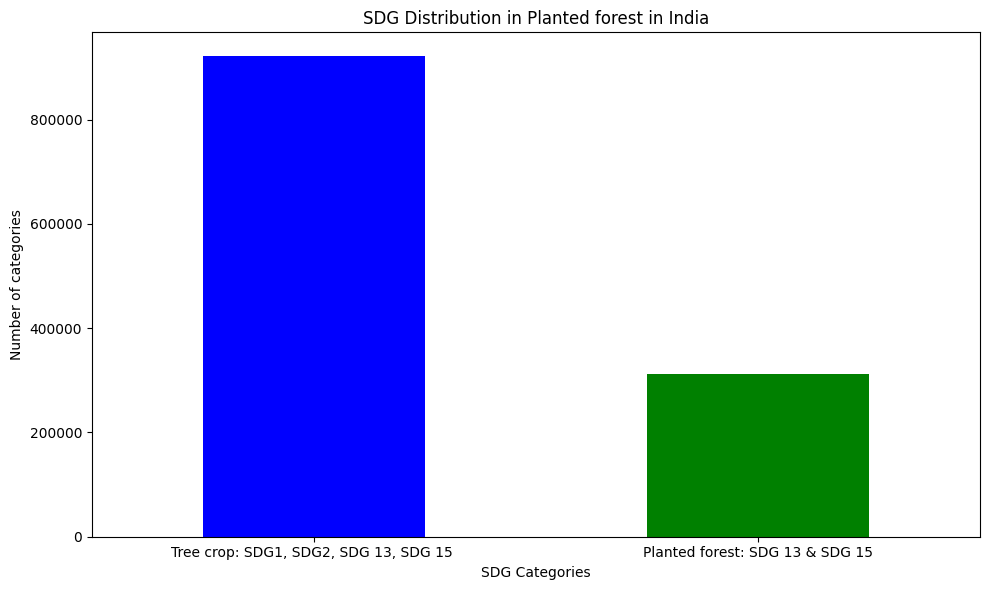

In [ ]:
# Create a bar chart
sdg_counts = ind_forest_df['SDG_Mapping'].value_counts()
plt.figure(figsize=(10, 6))
sdg_counts.plot(kind='bar', color=['blue', 'green'])
plt.title('SDG Distribution in Planted forest in India')
plt.xlabel('SDG Categories')
plt.ylabel('Number of categories')
plt.xticks(rotation=0)
plt.tight_layout()

# Display the plot
plt.show()

**Findings:**

There are more number of Tree crop in comparision to non-crop forest.

**5.2 Forest loss and impacting the SDG**

In [ ]:
## Loading the planted forest data
IFL_change_2000_2013 = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/LandCover/Forest_Loss/Intact_Forest_Landscapes/ifl_change_2000-2013.geojson")
# Read json file into a dataframe
IFL_change_2000_2013_df = gpd.read_file(IFL_change_2000_2013)
IFL_change_2000_2013_df.head(5)

,OBJECTID,CLASS_NAME,IFL13_ID,IFL00_ID,AREA_HA,Shape_Length,Shape_Area,geometry
0,1,IFL loss 2000-2013,,AUS_4,147.72,0.059975,0.000172,"POLYGON ((167.47138 -46.09798, 167.44968 -46.0..."
1,2,IFL loss 2000-2013,,AUS_4,63.47,0.035202,0.000074,"POLYGON ((167.40257 -46.09659, 167.40215 -46.0..."
2,3,IFL loss 2000-2013,,AUS_4,9.83,0.013617,0.000011,"POLYGON ((167.49943 -46.07999, 167.49956 -46.0..."
3,4,IFL loss 2000-2013,,AUS_5,49704.81,2.118030,0.056996,"POLYGON ((168.01756 -45.14770, 168.01726 -45.1..."
4,5,IFL loss 2000-2013,,AUS_9,174.98,0.059593,0.000195,"POLYGON ((146.82525 -43.57637, 146.81777 -43.5..."


In [ ]:
# The unique values to map
unique_names = IFL_change_2000_2013_df['CLASS_NAME'].unique()
for name in unique_names:
    print(name)
print("Number of unique items:", len(unique_names))

IFL loss 2000-2013
IFL fire-related loss 2000-2013
IFL2013
Number of unique items: 3


Description of the categories of the classes in the "CLASS_NAME" column":

**IFL loss 2000-2013:** This refers to the areas of intact forest landscapes that were lost or degraded between the years 2000 and 2013. This could be due to various factors such as deforestation, infrastructure development, or other human activities.

**IFL fire-related loss 2000-2013:** This specifically refers to the areas of intact forest landscapes that were lost or degraded due to fires between the years 2000 and 2013. Wildfires can have significant impacts on forests, affecting biodiversity, ecosystem services, and carbon storage.

**IFL2013:** This refers to the areas that were identified as intact forest landscapes in the year 2013. Intact forest landscapes are large, contiguous areas of forest that are free from significant human disturbance, and they are important for biodiversity conservation, climate regulation, and supporting the livelihoods of indigenous and local communities.

In [ ]:
#Standardising the column names
IFL_change_2000_2013_df.columns = column_std(IFL_change_2000_2013_df)

#Clipping the dataset to retain data about only India
ind_IFL_df = clip_df(IFL_change_2000_2013_df, ind_df)
ind_IFL_df= ind_IFL_df[['class_name','area_ha','geometry']]

#Clipping the dataset to retain data about only Himalayan States

himalaya_IFL_df = clip_df(ind_IFL_df, all_states_df)


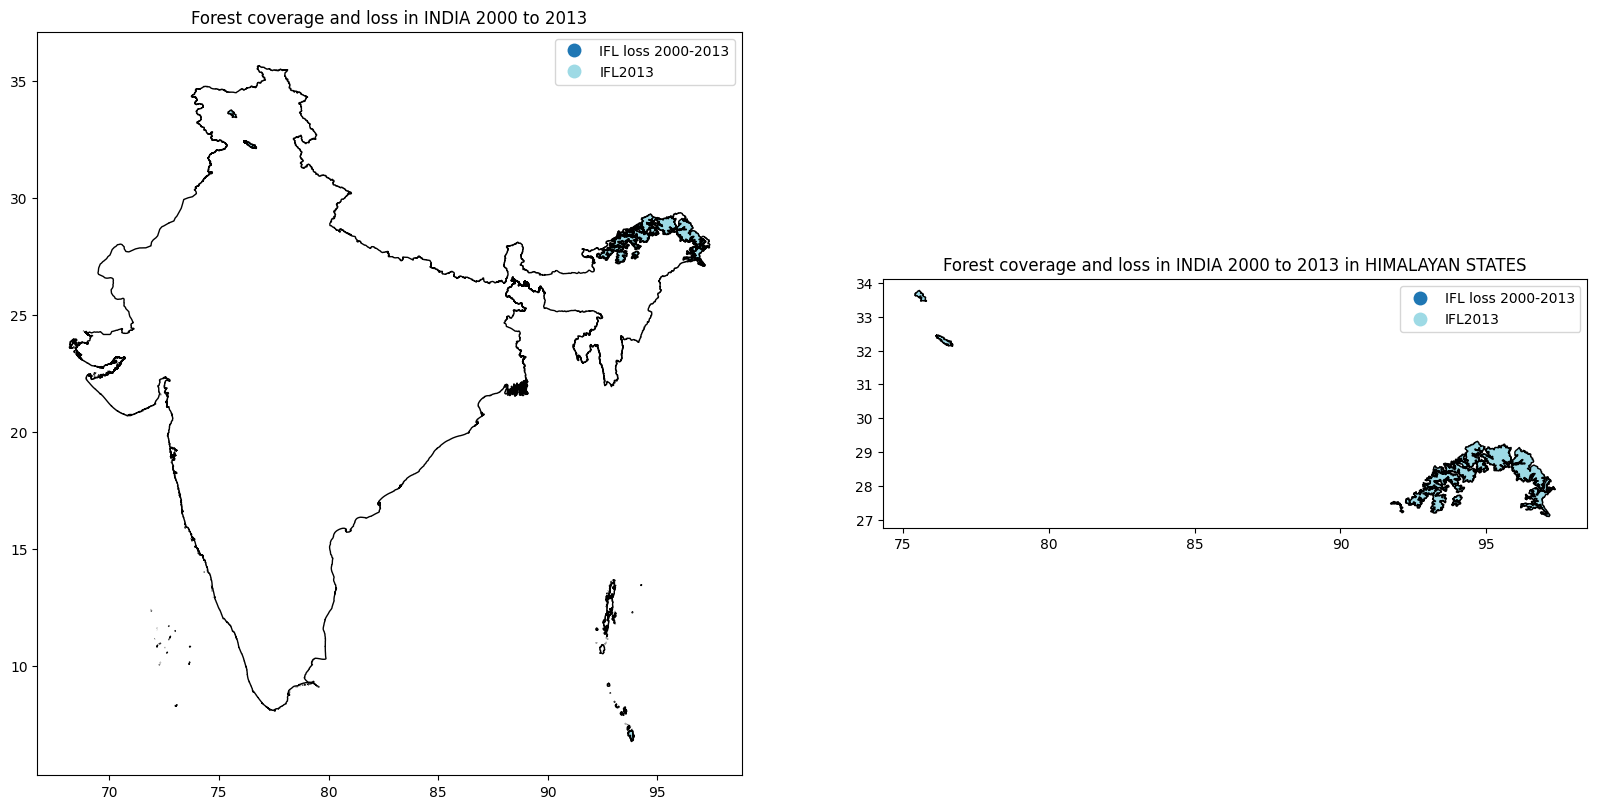

In [ ]:
#Plotting the biodiversity map of India
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 15))
ax1.set_title('Forest coverage and loss in INDIA 2000 to 2013')
ax2.set_title('Forest coverage and loss in INDIA 2000 to 2013 in HIMALAYAN STATES')
plot_boundary(ind_df, ax1)
plot_feature(ind_IFL_df, ax1, "class_name")
plot_feature(himalaya_IFL_df, ax2, "class_name")
plt.show()

In [ ]:
ind_IFL_df.head(5)

,class_name,area_ha,geometry
50591,IFL2013,71329.34,"MULTIPOLYGON (((93.78852 7.20002, 93.78875 7.2..."
30049,IFL loss 2000-2013,122.44,"POLYGON ((93.42882 27.28228, 93.42546 27.28029..."
29954,IFL2013,98394.81,"POLYGON ((96.36527 27.29067, 96.36160 27.29226..."
30011,IFL loss 2000-2013,69855.63,"MULTIPOLYGON (((91.72108 27.47231, 91.72110 27..."
30041,IFL loss 2000-2013,4.42,"POLYGON ((92.59476 27.41617, 92.59461 27.41624..."


In [ ]:
# enlisting unique intems in the column
unique_names = ind_IFL_df['class_name'].unique()
for name in unique_names:
    print(name)
print("Number of unique items:", len(unique_names))

IFL2013
IFL loss 2000-2013
Number of unique items: 2


In [ ]:
class_name_counts = ind_IFL_df['class_name'].value_counts()
print(class_name_counts)

IFL loss 2000-2013    69
IFL2013               11
Name: class_name, dtype: int64


There are two only two classes in "ind_IFL_df" which is the dataframe for India:

1. 'IFL2013': They are the intact forest
2. 'IFL loss 2000-2013' : Forest lost during the period of 2000 to 2013

The intact forest will support the SDG-13 (Climate action) and SDG-15 (life on land). I will be mapping these attribute to the SDGs in the following section.

In [ ]:
def forest_loss_to_sdg(row):
    # List of known marine hotspots
    forest_loss = [
       # 'IFL2013',
      'IFL loss 2000-2013'
    ]

    # Check if the planted trees are forest tree or the crop tree
    if row['class_name'] in forest_loss:
        return "Forest loss 2000-2013: SDG loss "
    else:
        return "Forest_intact: SDG 13 & 15"

In [ ]:
# Apply the mapping functions

ind_IFL_df['SDG_Mapping'] = ind_IFL_df.apply(forest_loss_to_sdg, axis=1)

In [ ]:
ind_IFL_df.to_file("forest_loss.json", driver='GeoJSON')

In [ ]:
ind_IFL_df.head(5)

,class_name,area_ha,geometry,SDG_Mapping
50591,IFL2013,71329.34,"MULTIPOLYGON (((93.78852 7.20002, 93.78875 7.2...",Forest_intact: SDG 13 & 15
30049,IFL loss 2000-2013,122.44,"POLYGON ((93.42882 27.28228, 93.42546 27.28029...",Forest loss 2000-2013: SDG loss
29954,IFL2013,98394.81,"POLYGON ((96.36527 27.29067, 96.36160 27.29226...",Forest_intact: SDG 13 & 15
30011,IFL loss 2000-2013,69855.63,"MULTIPOLYGON (((91.72108 27.47231, 91.72110 27...",Forest loss 2000-2013: SDG loss
30041,IFL loss 2000-2013,4.42,"POLYGON ((92.59476 27.41617, 92.59461 27.41624...",Forest loss 2000-2013: SDG loss


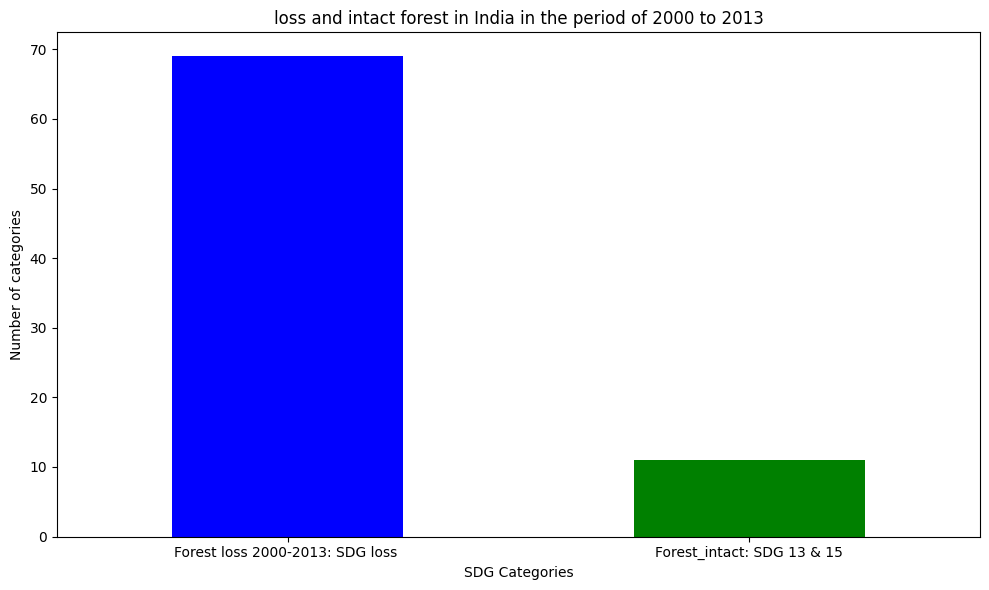

In [ ]:
# Create a bar chart
sdg_counts = ind_IFL_df['SDG_Mapping'].value_counts()
plt.figure(figsize=(10, 6))
sdg_counts.plot(kind='bar', color=['blue', 'green'])
plt.title('loss and intact forest in India in the period of 2000 to 2013')
plt.xlabel('SDG Categories')
plt.ylabel('Number of categories')
plt.xticks(rotation=0)
plt.tight_layout()

# Display the plot
plt.show()

**Findings:**

There is a considerable loss of forest that were lost or degraded between the years 2000 and 2013. This could be due to various factors such as deforestation, infrastructure development, or other human activities. This loss of forest will also result in impacting the SDG associated with it, such as SDG-13 (climate action) and SDG-15 (life on land)

  **5.3 Exploring the number of biodiversity hotspots in India**

  Biodiversity hotspots are regions that are both rich in endemic species and threatened by human activities. These areas have high levels of plant and animal diversity, with many species that are not found anywhere else in the world. At the same time, biodiversity hotspots are at risk of significant habitat loss due to factors such as agriculture, urbanization, deforestation, and climate change.

In [ ]:
## Loading the global biodiversity hotspots data
bio_hotspot = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Bioclimatic&EcologicalZones/CI_BiodiversityHotspots.geojson")


# Read geojson file into a geodataframe
bio_hotspot_df = gpd.read_file(bio_hotspot)
bio_hotspot_df.head(5)

,OBJECTID,NAME,Type,Shape_Length,Shape_Area,geometry
0,1,Chilean Winter Rainfall and Valdivian Forests,hotspot area,200.706891,40.754665,"MULTIPOLYGON (((-74.59792 -46.92502, -74.61111..."
1,2,Chilean Winter Rainfall and Valdivian Forests,outer limit,191.174978,186.085694,"POLYGON ((-70.30946 -22.96028, -70.48596 -22.7..."
2,3,Cape Floristic Region,hotspot area,93.790123,7.610383,"MULTIPOLYGON (((23.08672 -34.07310, 23.08538 -..."
3,4,Maputaland-Pondoland-Albany,hotspot area,49.631419,25.366584,"MULTIPOLYGON (((24.48767 -34.10045, 24.48800 -..."
4,5,New Caledonia,hotspot area,24.637100,1.646954,"MULTIPOLYGON (((167.46053 -22.71228, 167.46161..."


In [ ]:
#Standardising the column names
bio_hotspot_df.columns = column_std(bio_hotspot_df)

#Clipping the dataset to retain data about only India
ind_bio_df = clip_df(bio_hotspot_df, ind_df)

#Clipping the dataset to retain data about only Himalayan States

himalaya_bio_df = clip_df(ind_bio_df, all_states_df)


In [ ]:
# Get unique values in the "Name" column
unique_names = ind_bio_df['name'].unique()
for name in unique_names:
    print(name)
print("Number of unique items:", len(unique_names))

Sundaland
Indo-Burma
Western Ghats and Sri Lanka
Himalaya
Number of unique items: 4


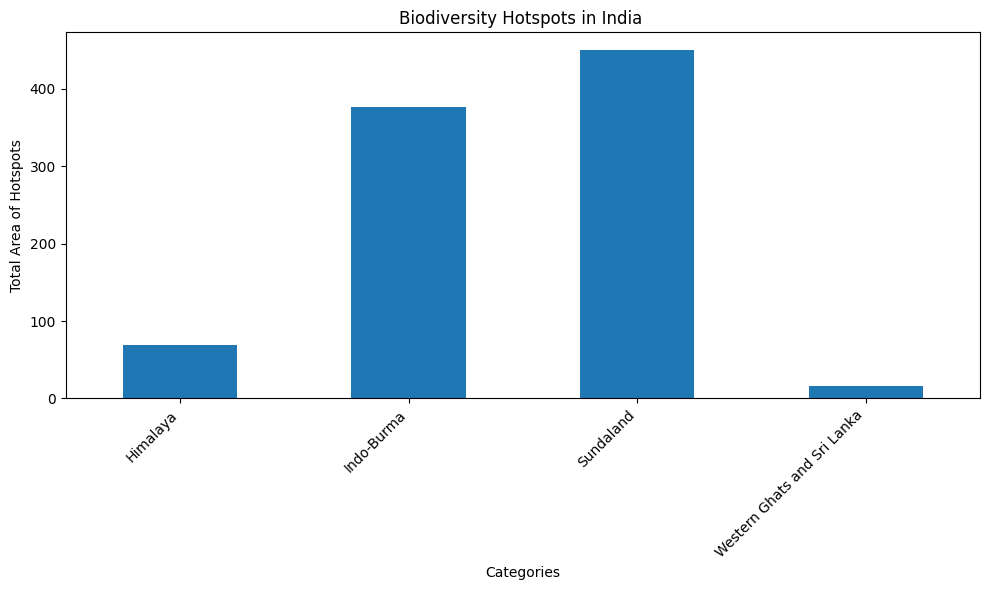

In [ ]:
# Create a bar chart
area = ind_bio_df.groupby('name')['shape_area'].sum()  # Group by NAME and sum Shape_Area
plt.figure(figsize=(10, 6))
area.plot(kind='bar')  # Use the data directly here
plt.title('Biodiversity Hotspots in India ')
plt.xlabel('Categories')
plt.ylabel('Total Area of Hotspots')  # Changed this to reflect what is being plotted
plt.xticks(rotation=45, ha='right')  # Rotated for better readability
plt.tight_layout()

# Display the plot
plt.show()


**Findings:**

There are 4 biodiversity hotspots in India:

- Sundaland
- Indo-Burma
- Western Ghats
- Himalaya

The above barchart shows that the sundaland is the largest among them.

SDG 15: Life on Land
Dataset Attributes:

The CI Biodiversity Hotspots dataset gives information on area of the protected land and the name of the biodiversity hotspot.

SDG 15, Life on Land, focuses on the protection, restoration, and promotion of sustainable use of terrestrial ecosystems, sustainable management of forests, combating desertification, and halting and reversing land degradation and biodiversity loss.

When mapping land sector datasets with SDG 15, the area of biodiversity hotspots plays a crucial role in achieving this goal. Biodiversity hotspots are regions with high levels of species richness and endemism, which are under significant threat from human activities. Protecting these hotspots is integral to preserving unique ecosystems and the species that inhabit them.

**5.4 Ecological Zones**

Ecological zones are typically characterized by distinct vegetation types, which are influenced by factors such as temperature, precipitation, and soil type.


In [ ]:
## Loading the global ecological zones data
ind_GEZ = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Administrative/Boundaries/Level2 by Country/IND/IND_AL2_India_GEZ.json")
ind_GEZ= gpd.read_file(ind_GEZ)
ind_GEZ

,country,ISO3166_2,name,gez_name,gez_code,gez_abbrev,adminlevel,geometry
0,IND,,India,Subtropical mountain system,25,SM,2,"MULTIPOLYGON (((93.38087 27.46374, 93.44117 27..."
1,IND,,India,Subtropical steppe,23,SBSh,2,"MULTIPOLYGON (((73.92919 34.30517, 73.92148 34..."
2,IND,,India,Temperate mountain system,35,TeM,2,"MULTIPOLYGON (((78.26877 34.63843, 78.26877 34..."
3,IND,,India,Tropical desert,15,TBWh,2,"MULTIPOLYGON (((69.25014 22.26431, 69.25014 22..."
4,IND,,India,Tropical dry forest,13,TAwb,2,"MULTIPOLYGON (((79.70680 10.28820, 79.70292 10..."
5,IND,,India,Tropical moist forest,12,TAwa,2,"MULTIPOLYGON (((73.45926 16.04566, 73.45924 16..."
6,IND,,India,Tropical mountain system,16,TM,2,"MULTIPOLYGON (((77.14367 10.22904, 77.14367 10..."
7,IND,,India,Tropical rainforest,11,TAr,2,"MULTIPOLYGON (((93.78876 6.90034, 93.78876 6.9..."
8,IND,,India,Tropical shrubland,14,TBSh,2,"MULTIPOLYGON (((77.55412 8.07834, 77.55416 8.0..."


In [ ]:
# Loading the global ecological zones data for the all the Himalayan States

hima_gez_df = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Bioclimatic&EcologicalZones/Global_Ecological_Zone_GEZ/byStateGEZ/IND/IND_AL4_Himachal Pradesh_GEZ.json")
hima_gez_df= gpd.read_file(hima_gez_df)

aruna_gez_df = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Bioclimatic&EcologicalZones/Global_Ecological_Zone_GEZ/byStateGEZ/IND/IND_AL4_Arunachal Pradesh_GEZ.json")
aruna_gez_df= gpd.read_file(aruna_gez_df)

JK_gez_df = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Bioclimatic&EcologicalZones/Global_Ecological_Zone_GEZ/byStateGEZ/IND/IND_AL4_Jammu and Kashmir_GEZ.json")
JK_gez_df = gpd.read_file(JK_gez_df )

uttra_gez_df = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Bioclimatic&EcologicalZones/Global_Ecological_Zone_GEZ/byStateGEZ/IND/IND_AL4_Uttarakhand_GEZ.json")
uttra_gez_df = gpd.read_file(uttra_gez_df)

sikkim_gez_df = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Bioclimatic&EcologicalZones/Global_Ecological_Zone_GEZ/byStateGEZ/IND/IND_AL4_Sikkim_GEZ.json")
sikkim_gez_df = gpd.read_file(sikkim_gez_df)

assam_gez_df = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Bioclimatic&EcologicalZones/Global_Ecological_Zone_GEZ/byStateGEZ/IND/IND_AL4_Assam_GEZ.json")
assam_gez_df = gpd.read_file(assam_gez_df)

bihar_gez_df = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Bioclimatic&EcologicalZones/Global_Ecological_Zone_GEZ/byStateGEZ/IND/IND_AL4_Bihar_GEZ.json")
bihar_gez_df = gpd.read_file(bihar_gez_df)

west_beng_gez_df = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Bioclimatic&EcologicalZones/Global_Ecological_Zone_GEZ/byStateGEZ/IND/IND_AL4_West Bengal_GEZ.json")
west_beng_gez_df = gpd.read_file(west_beng_gez_df)

UP_gez_df = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Bioclimatic&EcologicalZones/Global_Ecological_Zone_GEZ/byStateGEZ/IND/IND_AL4_Uttar Pradesh_GEZ.json")
UP_gez_df = gpd.read_file(UP_gez_df)

In [ ]:
# Joining all the satewise datasets in to one df
state_gez_dfs = [hima_gez_df, aruna_gez_df, JK_gez_df,uttra_gez_df,sikkim_gez_df,assam_gez_df,UP_gez_df, bihar_gez_df, west_beng_gez_df ]
all_states_gez_df = pd.concat(state_gez_dfs)

In [ ]:
#Clipping the dataset to retain data about only India and Himalayan states
all_states_gez_df.columns = column_std(all_states_gez_df)
all_states_gez_df = all_states_gez_df[['gez_name', 'geometry']]


In [ ]:
# The list of global ecological zones in India
unique_names = ind_GEZ['gez_name'].unique()
for name in unique_names:
    print(name)
print("Number of unique items:", len(unique_names))

Subtropical mountain system
Subtropical steppe
Temperate mountain system
Tropical desert
Tropical dry forest
Tropical moist forest
Tropical mountain system
Tropical rainforest
Tropical shrubland
Number of unique items: 9


In [ ]:
# The list of global ecological zones in Himalayan states of India
unique_names = all_states_gez_df['gez_name'].unique()
for name in unique_names:
    print(name)
print("Number of unique items:", len(unique_names))

Subtropical mountain system
Tropical moist forest
Tropical mountain system
Tropical rainforest
Subtropical steppe
Temperate mountain system
Tropical shrubland
Tropical dry forest
Number of unique items: 8


**Findings:**

**There are 9 kinds of ecological zones in India and 8 of them are present in Himalayan region.**

The ecological zones in himalayan region:

- Subtropical mountain system

- Tropical moist forest

- Tropical mountain system

- Tropical rainforest

- Subtropical steppe

- Temperate mountain system

- Tropical shrubland

- Tropical dry forest


SDG 6 (Clean Water and Sanitation) : Ecological zones such as wetlands play a crucial role in water purification and supply.

SDG 13 (Climate Action) : Ecological zones such as forests act as carbon sinks, helping to mitigate climate change.

SDG 14 (Life Below Water) : Coastal and marine ecological zones are important for maintaining healthy oceans and marine life.

SDG 15 (Life on Land) : This is the most directly related goal. Ecological zones are vital for sustaining terrestrial life, and their conservation is key to protecting biodiversity, combating desertification, and managing forests sustainably.

Dataset Attributes: It is important to know the type and number of diverse ecological zones which are present in the Himalayan region because understanding the diverse ecological zones in the Himalayan region is crucial for achieving several Sustainable Development Goals (SDGs). For SDG 6 (Clean Water and Sanitation), the region's river systems need to be effectively managed to ensure access to clean water. In terms of SDG 13 (Climate Action), the Himalayas significantly influence South Asia's climate, and studying its ecological zones is vital for developing climate change mitigation and adaptation strategies. Similarly, for SDG 14 (Life Below Water), the conservation of aquatic biodiversity in the rivers originating from the Himalayas is essential. The region's rich biodiversity, crucial for SDG 15 (Life on Land), requires understanding of ecological zones to protect habitats and manage natural resources sustainably.

**5.5 Holdridges Life Zones in Himalayan States**

Holdridge's Life Zones is a biogeographic classification system. It is based on the principle that both vegetation and climate are intimately linked. The system uses three climatic variables to define life zones: Biological Temperature, Total Precipitation, Potential Evapotranspiration Ratio (PET).


In [ ]:
#Loading the global Holdridge Life Zones data
holdridge_zones = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Bioclimatic&EcologicalZones/HoldridgeLifeZones.json")
holdridge_zones_df = gpd.read_file(holdridge_zones)
holdridge_zones_df.head(5)

,FID,AREA,PERIMETER,HOLDRIG_,HOLDRIG_ID,ZONE,CASE_,FREQUENCY,DESC,SYMBOL,geometry
0,0,240.50,173,2,3695,1,2,13,Ice,5,"POLYGON ((-61.00000 81.00000, -61.50000 81.000..."
1,1,1.25,6,3,110,2,3,232,Polar desert,5,"POLYGON ((-80.50000 83.00000, -81.00000 83.000..."
2,2,49.75,72,4,107,1,2,13,Ice,5,"POLYGON ((-80.50000 83.00000, -80.50000 82.500..."
3,3,0.25,2,5,108,2,3,232,Polar desert,5,"POLYGON ((-80.00000 83.00000, -80.00000 82.500..."
4,4,0.25,2,6,109,2,3,232,Polar desert,5,"POLYGON ((-73.50000 83.00000, -73.50000 82.500..."


In [ ]:
#Clipping the datasets to retain data about only India
holdridge_ind_df = holdridge_zones_df.clip(ind_df)

#Clipping the dataset to retain data about only Himalayan States
himalaya_holdridge_df = clip_df(holdridge_ind_df, all_states_df)

In [ ]:
# Get unique values in the "Name" column
unique_names = himalaya_holdridge_df['DESC'].unique()
for name in unique_names:
    print(name)
print("Number of unique items:", len(unique_names))

Subtropical moist forest
Subtropical wet forest
Subtropical dry forest
Tropical very dry forest
Tropical dry forest
Cool temperate wet forest
Tropical moist forest
Subtropical rain forest
Subtropical desert bush
Cool temperate rain forest
Warm temperate moist forest
Warm temperate wet forest
Warm temperate desert bush
Cool temperate steppe
Polar rain tundra
Boreal rain forest
Subtropical thorn steppe
Polar desert
Cool temperate moist forest
Boreal wet forest
Polar moist tundra
Polar wet tundra
Boreal moist forest
Polar dry tundra
Boreal desert
Boreal dry bush
Number of unique items: 26


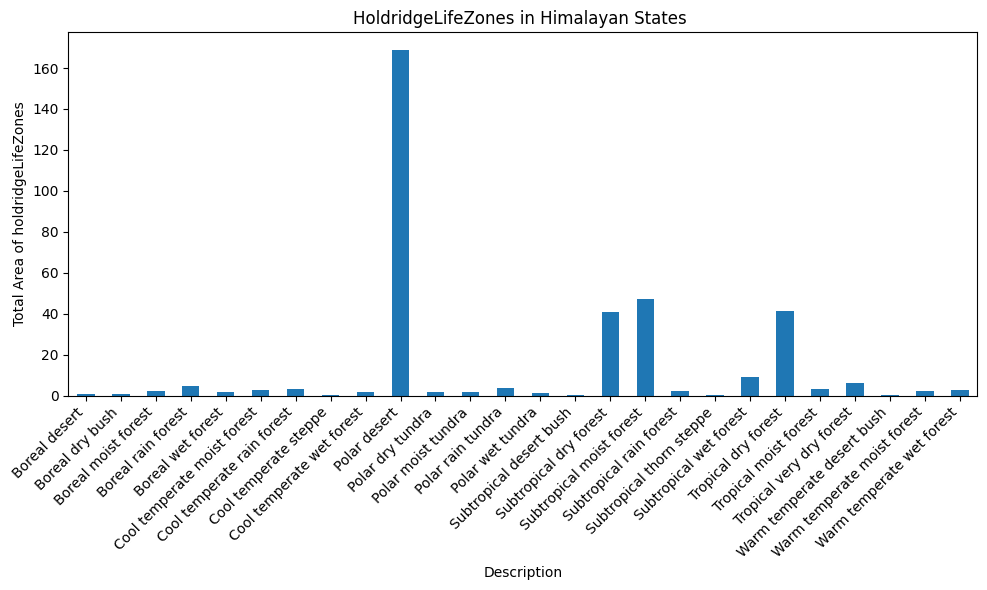

In [ ]:
# Create a bar chart
area = himalaya_holdridge_df.groupby('DESC')['AREA'].sum()  # Group by NAME and sum Shape_Area
plt.figure(figsize=(10, 6))
area.plot(kind='bar')  # Use the data directly here
plt.title('HoldridgeLifeZones in Himalayan States ')
plt.xlabel('Description')
plt.ylabel('Total Area of holdridgeLifeZones')  # Changed this to reflect what is being plotted
plt.xticks(rotation=45, ha='right')  # Rotated for better readability
plt.tight_layout()

# Display the plot
plt.show()

**Findings:**

Total 26 Holdridge Life Zones are found in Himalayan region.

The above bar chart shows that the polar desert holdridge zone has the highest coverage area in the himalayan region followed by subtropical moist forest.

Holdridges Life Zones also covers the same SDGs as mentioned in the ecological zones.

SDG 15 (Life on Land): Holdridge's Life Zones provide valuable information on different terrestrial ecosystems and their characteristics. This information is crucial for the conservation, restoration, and sustainable use of terrestrial ecosystems, including forests, wetlands, mountains, and drylands, as outlined in SDG 15.

SDG 13 (Climate Action): The classification helps understand the potential impacts of climate change on different ecosystems, thus contributing to climate change mitigation and adaptation strategies.

SDG 6 (Clean Water and Sanitation): By helping to understand the ecosystems around water bodies, the datasets can contribute to the management and conservation of freshwater resources.

SDG 14 (Life Below Water): Although primarily focused on terrestrial environments, the zones can indirectly contribute to the conservation and sustainable use of oceans, seas, and marine resources by providing data on coastal and estuarine ecosystems.

Dataset Attributes: Information on the type and area of Holdridge life zones in the Himalayan region is vital for biodiversity conservation, climate change mitigation and adaptation, freshwater resource management, and sustainable use of marine resources, which are all key aspects of the mentioned SDGs.

In [ ]:
# Agro-Ecological Map
# Loading the Agro-Ecological data for India
ageco_df = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Bioclimatic&EcologicalZones/GAEZ_Global_AgroEcological_Zones/GlobalAgroEcologicalZones_GAEZ.geojson")
# Read geojson file into a geodataframe
ageco_df = gpd.read_file(ageco_df)

values = {'1': 'Steep terrain', '2': 'Artic/Cold', '3': 'Desert/Arid',
          '4': 'Irrigated Soils', '5': 'Hydromorphic soils',
          '6': 'Dry, good soils', '7': 'Dry, moderate soils', '8': 'Dry, poor soils',
          '9': 'Moist, good soils', '10': 'Moist, moderate soils',
          '11': 'Moist, poor soils', '12': 'Sub-humid, good soils',
          '13': 'Sub-humid, moderate soils', '14': 'Sub-humid, poor soils',
          '15': 'Humid, good soils', '16': 'Humid, moderate soils',
          '17': 'Humid, poor soils', '18': 'Water'}

# # normalizing column name
ageco_df.rename(columns={'Value': 'value'}, inplace=True)

# using defined values and replacing them to the corresponding codes
ageco_df.value = ageco_df.value.astype('str').replace(values)

# # normalizing column name
ageco_df.rename(columns={'Value': 'value'}, inplace=True)

# using defined values and replacing them to the corresponding codes
ageco_df.value = ageco_df.value.astype('str').replace(values)

#Clipping the datasets to retain data about only India
agroecological_ind_df  = ageco_df.clip(ind_df)

#Clipping the dataset to retain data about only Himalayan States
himalaya_agroecological_df = clip_df(agroecological_ind_df, all_states_df)


# Climate Zones

#Loading the global biodiversity hotspots data
cli_zones = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Climate/IPCC_ClimateZoneMap_Vector.geojson")
cli_zones_df = gpd.read_file(cli_zones)


classification = {'1': 'Warm Temperate Moist', '2': 'Warm Temperate Dry',
                          '3': 'Cool Temperate Moist', '4': 'Cool Temperate Dry',
                          '5': 'Polar Moist', '6': 'Polar Dry',
                          '7': 'Boreal Moist', '8': 'Boreal Dry',
                          '9': 'Tropical Montane','10':'Tropical Montane','11':'Tropical Montane','12': 'Warm Temperate Dry'}

# normalizing column name
cli_zones_df.rename(columns={'CLASS_NAME': 'class_name'}, inplace=True)

# treating oceans
cli_zones_df = cli_zones_df[cli_zones_df.class_name != '0']

# using defined class names and replacing them to the corresponding codes
cli_zones_df.class_name = cli_zones_df.class_name.astype('str').replace(classification)

cli_zones_df.columns = cli_zones_df.columns.str.lower()

#Clipping the datasets to retain data about only India
climate_ind_df = cli_zones_df.clip(ind_df)

#Clipping the dataset to retain data about only Himalayan States
himalaya_cli_df = clip_df(climate_ind_df, all_states_df)

##5.6 Map of Himalayan States for its climate zones, biodiversity hotspot, agroecological zones, holdridge lize zones and global ecological zones

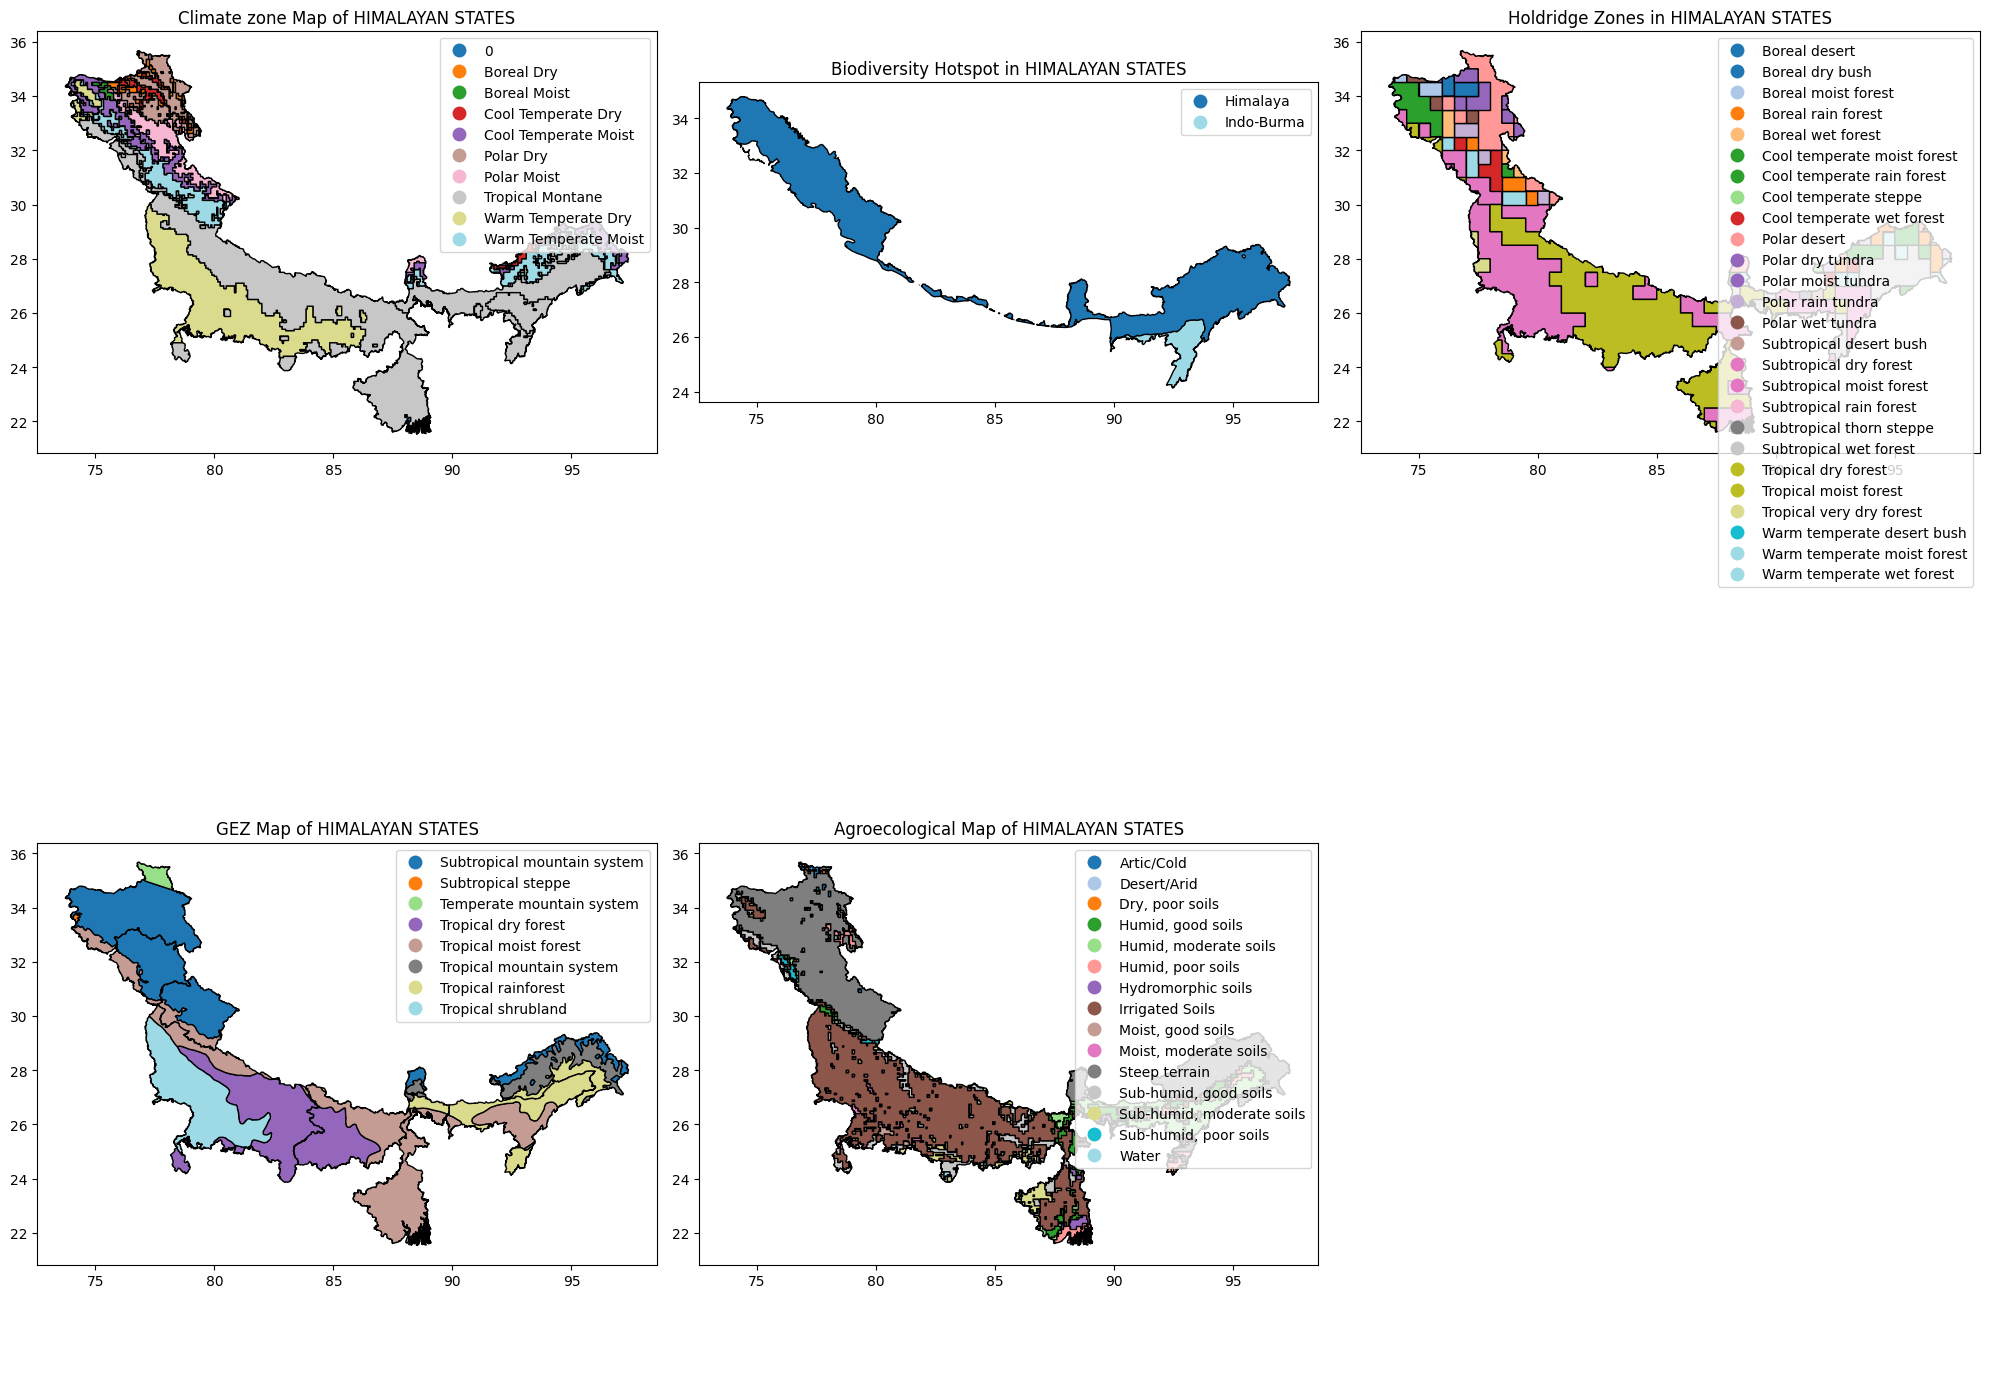

In [ ]:
#Plotting the biodiversity map of India
fig, axs = plt.subplots(2, 3, figsize=(20, 15))
(ax1, ax2, ax3), (ax4, ax5, ax6) = axs

# Set titles for each subplot
ax1.set_title("Climate zone Map of HIMALAYAN STATES")
ax2.set_title('Biodiversity Hotspot in HIMALAYAN STATES')
ax3.set_title('Holdridge Zones in HIMALAYAN STATES')
ax4.set_title("GEZ Map of HIMALAYAN STATES")
ax5.set_title("Agroecological Map of HIMALAYAN STATES")


# Turn off the sixth axis as it's unused
ax6.axis('off')

# Plot features on each subplot
plot_feature(himalaya_cli_df, ax1, column='class_name')
plot_feature(himalaya_bio_df, ax2, "name")
plot_feature(himalaya_holdridge_df, ax3,  column='DESC')
plot_feature(all_states_gez_df, ax4, 'gez_name')
plot_feature(himalaya_agroecological_df, ax5, column='value')


plt.tight_layout()
plt.show()

#**Agroecological Zones**

SDG 2 (Zero Hunger): Agroecological zones help identify suitable areas for different types of crops and livestock, contributing to increased food production and improved food security.

SDG 6 (Clean Water and Sanitation): These datasets can assist in the management of water resources for agriculture, ensuring efficient use of water and reducing water pollution.

SDG 12 (Responsible Consumption and Production): Agroecological zones provide information necessary for sustainable agriculture practices that minimize environmental impacts and promote efficient use of resources.

SDG 13 (Climate Action): The datasets can be used to analyze the impacts of climate change on agriculture and develop adaptation strategies for farmers.

SDG 15 (Life on Land): Agroecological zones can play a role in conserving ecosystems and biodiversity in agricultural landscapes, as well as in the restoration of degraded lands.

Dataset Attributes: Maps of agroecological zones provide valuable information for achieving Sustainable Development Goals (SDGs) by delineating regions based on their agricultural potential and ecological characteristics. These maps can help identify suitable areas for different types of crops and livestock, contributing to food security (SDG 2). They also support sustainable agriculture practices that minimize environmental impacts and promote efficient use of resources (SDG 12). Additionally, such maps are essential for water resource management in agriculture, ensuring clean water availability (SDG 6). Furthermore, agroecological zones can be used to assess the impacts of climate change on agriculture and develop adaptation strategies for farmers (SDG 13), while also playing a role in conserving ecosystems and biodiversity in agricultural landscapes and restoring degraded lands (SDG 15). In summary, maps of agroecological zones are crucial tools for informed decision-making in agriculture, contributing to food security, sustainable resource use, and environmental conservation.

#**Climate Zones**

The data on climate zones, therefore, plays a crucial role in achieving multiple SDGs by providing crucial information for decision-making in climate action, biodiversity conservation, sustainable agriculture, water management, urban planning, and public health.

Dataset Attributes: A map of climate zones can serve as a vital tool for mapping and achieving the Sustainable Development Goals (SDGs) by providing essential data to inform decision-making across various sectors. For instance, climate zone maps can inform strategies for climate action (SDG 13) by identifying regions that are most vulnerable to climate change and require targeted mitigation and adaptation measures. In terms of life on land (SDG 15), climate zone maps can help identify key biodiversity areas and their specific climate conditions, facilitating targeted conservation efforts. Moreover, these maps can support sustainable agriculture practices (SDG 2) by identifying suitable regions for different crops and farming methods, based on their climate conditions, thereby contributing to food security. Additionally, climate zone maps can guide water management practices (SDG 6) by indicating regions that may experience water scarcity or flooding due to climate variability, enabling the implementation of appropriate water conservation or infrastructure measures. In urban planning (SDG 11), climate zone maps can be used to design infrastructure that is resilient to local climate impacts, ultimately contributing to the development of sustainable cities and communities. Overall, mapping climate zones in relation to the SDGs can provide a comprehensive overview of the challenges and opportunities associated with each goal, facilitating more informed and effective interventions.


# **6. Conclusion**


The climate zones significantly impact biodiversity hotspots, agroecological zones, Holdridge life zones, and global ecological zones, especially in a diverse and sensitive region like the Himalayas.

**Biodiversity Hotspots:**

Climate zones determine the type of flora and fauna that can survive in a particular region.The Himalayas, being a biodiversity hotspot, are home to numerous species that are adapted to specific climate zones.Changes in climate can threaten these species, potentially leading to loss of biodiversity.

**Agroecological Zones:**

Agroecological zones are areas where the use of land is optimized according to the climate and soil conditions to support agriculture.In the Himalayan region, various climate zones allow for diverse agricultural practices, supporting a range of crops suited to different altitudes and temperatures. Climate change can alter these zones, affecting food security and livelihoods of local communities.

**Holdridge Life Zones:**

Holdridge life zones are used to classify regions based on their climate, specifically temperature, rainfall, and potential evapotranspiration.The Himalayan region comprises several Holdridge life zones, from alpine meadows to subtropical forests. Shifts in climate zones could result in changes to these life zones, affecting the species that inhabit them and the overall ecosystem balance.

**Global Ecological Zones:**

Global ecological zones are broad biomes defined by their climate and dominant vegetation type. The Himalayan region encompasses several global ecological zones, including montane grasslands and shrublands, temperate broadleaf and mixed forests, and more. The distinct climate of each zone shapes its ecology, and any changes in climate can have cascading effects on the ecosystem.


Biodiversity hotspots, agroecological zones, Holdridge life zones, global ecological zones, and climate datasets are invaluable tools for achieving various Sustainable Development Goals (SDGs):

SDG 2 - Zero Hunger: These datasets can help identify suitable regions for different crops and farming methods based on their ecological characteristics and climate conditions, thereby supporting sustainable agriculture and food security.

SDG 6 - Clean Water and Sanitation: These datasets can guide water management practices by indicating regions that may experience water scarcity or flooding due to ecological and climatic variations, enabling the implementation of appropriate water conservation or infrastructure measures.

SDG 11 - Sustainable Cities and Communities: These datasets can be used in urban planning to design infrastructure that is resilient to local ecological and climate impacts, ultimately contributing to the development of sustainable cities and communities.

SDG 13 - Climate Action: These datasets can inform strategies for climate action by identifying regions that are most vulnerable to climate change based on their ecological characteristics and require targeted mitigation and adaptation measures.

SDG 15 - Life on Land: These datasets can help identify key biodiversity areas and their specific ecological conditions, facilitating targeted conservation efforts. Additionally, they can guide sustainable land use practices to prevent land degradation and restore degraded ecosystems.

**Summary**

The Himalayan region's complex mosaic of climate zones plays a crucial role in shaping its diverse ecosystems. Changes in climate, whether due to natural variability or human-induced factors, can have profound impacts on biodiversity, agriculture, and the overall ecological balance of this vital region.


**Recommendation for future research and development:**

- Conduct in-depth studies to unravel the complex interplay between climate change and environmental degradation in the Himalayan region, identifying key drivers and consequences of these phenomena.

- Investigate the effectiveness of existing conservation and sustainable development policies in mitigating environmental degradation in the Himalayan region.

- Explore the potential of innovative technologies and methodologies, such as remote sensing and GIS, in monitoring and managing environmental resources in the Himalayan region.

- Assess the socio-economic impacts of climate change and environmental degradation on local communities in the Himalayan.


**References:**

https://en.wikipedia.org/wiki/Himalayas

Shrestha, A. B., & Aryal, R. (2011). Climate Change in Nepal and its Impact on Himalayan Glaciers. Regional Environmental Change, 11(S1), 65-77.

Xu, J., Grumbine, R. E., Shrestha, A., Eriksson, M., Yang, X., Wang, Y., & Wilkes, A. (2009). The Melting Himalayas: Cascading Effects of Climate Change on Water, Biodiversity, and Livelihoods. Conservation Biology, 23(3), 520-530.

Pandit, M. K., & Grumbine, R. E. (2012). Potential Effects of Ongoing and Proposed Hydropower Development on Terrestrial Biological Diversity in the Indian Himalaya. Conservation Biology, 26(6), 1061-1071.

Singh, S. P., & Thadani, R. (2015). Impacts of Changing Climate and Climate Variability on the Structure and Functioning of Ecosystems in the Indian Himalayas. The Indian Himalayas: Climate Change Impacts, Vulnerability, and Adaptation, 9-35.